# Simple Trimcases

In this section a trim simulation is going to be present. The  simulation set-up in <em>Loads Kernel</em> was already shown in detail in a previous notebook. Hence, the focus will be more in the results and post processing. The results obtained in <em>Loads Kernel</em> are discussed and compared with the <em>MSC Nastran</em> results.

## Simulation Set-up

As disucssed previously, three trim cases were analysed. The three trim cases were performed at True Airspeed (TAS) of 70 m/s and Flight Level FL000. The first case corresponds to a horizontal level flight, a Load Factor of n<sub>Z</sub>=1; the second one to a push-down maneuver, a Load Factor of n<sub>Z</sub>=-1; and the third one to a pull-up maneuver, a Load Factor of n<sub>Z</sub>=2.5. These load cases where chosen having in consideration the flight envelope that was obtained using the CS-25 {cite}`cs25`.

In order to obtain the results the following 'launch.py' file is run. The results can be found in the folder 'DC-3_results'.

In [1]:
from loadskernel import program_flow

# Here you launch the Loads Kernel with your job
k = program_flow.Kernel('jcl_dc3_trim', pre=True, main=True, post=True, test=False,
                        path_input='./DC3_model/JCLs',
                        path_output='./DC3_results')
k.run()

INFO: This is the log for process 0.
INFO: Starting Loads Kernel with job: jcl_dc3_trim
INFO: User carn_fr on schwalbe (Linux-4.18.0-513.24.1.el8_9.x86_64-x86_64-with-glibc2.28)
INFO: pre:  True
INFO: main: True
INFO: post: True
INFO: test: False
INFO: --> Reading parameters from JCL.
INFO: Generated list of 3 empty dicts.
INFO: --> Starting preprocessing.
INFO: Building structural model...
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/structure_only.bdf
INFO: Found include(s):
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/../fem/export_FUS.csv
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/../fem/left-wing/left-wing.GRID_LREFAX_5400001
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/../fem/left-wing/left-wing.RBE2_LREFAX_5400001
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/../fem/left-wing/left-wing.CORD2R_LREFAX
INFO: Read from file: /dat

## Results

In this section, the results of <em>Loads Kernel</em> are presented, for both the rigid and flexible versions. Moreover, these results are compared to the <em>MSC Nastran</em> results, obtained with SOL144. The purpose of this comparison is to prove the similarities of the outcome of both softwares.

One of the most interesting results from this simulation is the 'trim_results_jcl_dc3_trim.csv' file, where all the trim conditions for the different trim cases are discriminated. Upon examining the trim results, several notable conclusions emerge. the next table presents the &alpha;<sub>trim</sub> outcomes for the final modified model, revealing values that comfortably align within the acceptable range for both the rigid and flexible versions across both software programs. Comparing the results between both software it can be seen that they match quiet well, having just very small differences. To understand the sources of these small differences is important to discuss the differences between both software. While the simulation performed in <em>Loads Kernel</em>  is a modal analyses, the SOL144 performed in <em>MSC Nastran</em> it is not. Hence, for the <em>Loads Kernel</em>  case a convergence study had to be performed. For that, the number of eigenmodes truncated were progressively increased until the trim results converged. At the end, it was concluded that a total number of 71 eigenmodes is enough to obtain convergence. On top of that, <em>MSC Nastran</em> considers the elastic deformation on the wing root to be null, while <em>Loads Kernel</em> allows the wing root to have elastic deformation. This makes the comparison not so direct in the flexible case. For instance, in order to compare the &alpha;<sub>trim</sub> flexible results, in the <em>Loads Kernel</em> results for &alpha;<sub>trim</sub> the ”elastic incidence angle” (basically, the wing root elastic twist deformation) was subtracted. Comparative analysis between the rigid and flexible aircraft configurations reveals evident disparities. Notably, when comparing the <em>Loads Kernel</em> &alpha;<sub>trim</sub> results for horizontal level flight, a significant 26.6% difference emerges, underscoring the pronounced impact of aeroelasticity in aircraft design. This underscores the imperative of considering aeroelasticity into flight performance, stability, and control analyses.

<center>
<figure>
    <img src="./images/alpha_trim.png" width="400"
         alt="DC3">
    <center>
    <figcaption><em>Trim cases &alpha;<sub>trim</sub> results for the final modified model, for M3.</em></figcaption>
    </center>
</figure>
</center>

Further elucidating the significance of aeroelasticity, the next table shows the C<sub>L<sub>f</sub></sub>/C<sub>L</sub> (the percentage of the contribution of flexibility on the lift force) results obtained with <em>Loads Kernel</em>, highlighting the contribution of aircraft flexibility. For instance, in horizontal level flight, flexibility contributes a detrimental -5.22%. This negative contribution is explained analysing the elastic deformations of the main wing at these trim cases, as is going to be shown further on.

<center>
<figure>
    <img src="./images/lift_flex.png" width="200"
         alt="DC3">
    <center>
    <figcaption><em>Trim cases &alpha;<sub>trim</sub> results for the final modified model, for M3.</em></figcaption>
    </center>
</figure>
</center>

Additional information about these results can be consulted in {cite}`Carvalho2024`. To understand the influence of elasticity on aircraft performance, stability, and control, the main wing’s elastic deformations along the span is illustrated in the following figure across the different trim cases are analyzed.

<center>
<figure>
    <img src="./images/trim_deflections.png" width="700"
         alt="DC3">
    <center>
    <figcaption><em>Loads Kernel elastic deformation of the main wing at certain speed, M3 for the final modified aeroelastic model.</em></figcaption>
    </center>
</figure>
</center>

Elastic vertical displacement U<sub>flex,Z</sub> along the wing span reveals upward bending during horizontal level flight and pull-up maneuvers, and downward bending during push-down maneuvers. This alignment is expected, as lift force in the former cases lifts the wing, while in the latter, it pushes it downward.

Notably, during pull-up maneuvers, the most pronounced vertical displacements occur, particularly at the wing tip, reaching U<sub>flex,Z</sub>=1.55 m, equivalent to 10.7% of the half wing span. This displacement remains within the accepted range for linear elasticity assumptions applied in these analyses, typically valid until 12-15% of the tip’s vertical displacement relative to half the wing span.

Evaluating elastic twist U<sub>flex,ry</sub> along the wing span, a nose-down torsional twist is observed during horizontal level flight and pull-up maneuvers in the outer wing section, indicating negative twist values. At the inner section a nose-up torsional twist is observed, but with very small values compared with the outer section. On the opposite, during push-down maneuvers, the opposite trend is evident. Notably, the most significant elastic twist occurs at the wing tip during pull-up maneuvers, with a value of U<sub>flex,ry</sub>=−1.98 degrees. This substantial twist significantly influences lift distribution along the wing, hence affecting overall wing performance. To obtain this elastic deformation plots the file 'plot_wing_defo_trim-cases.py' can be found in the 'scripts' folder and it is presented below.

For additional information about the meanuver load results please refer to {cite}`Carvalho2024`.

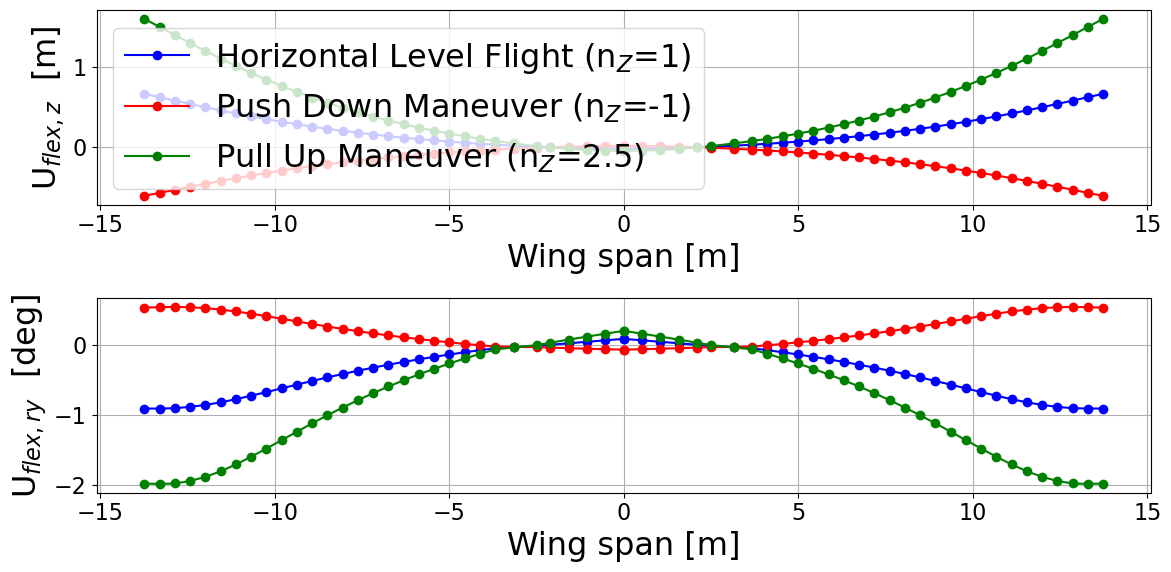

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
import IPython

notebook_path = IPython.get_ipython().run_line_magic('pwd','')
notebook_dir = pathlib.Path(notebook_path).resolve()
filename = path = os.path.join(notebook_dir, 'DC3_results', 'response_jcl_dc3_trim.hdf5')

#filename = './DC3_results/response_jcl_dc3_trim.hdf5'

# open HDF5 file
responses = h5py.File(filename, 'r')

# get response of first trim case
response = responses['0']
response2 = responses['1']
response3 = responses['2']
Ug_f = response['Ug_f'][:]
Ug_f2 = response2['Ug_f'][:]
Ug_f3 = response3['Ug_f'][:]

# extract ID, offset and set matrices
filename = '/data/carn_fr/DC3_LoadsKernel/model_jcl_dc3_more_flexibility3_trim_cases.hdf5'
model = h5py.File(filename, 'r')
strcgrid = model['strcgrid']
ID = strcgrid['ID'][:]
set = strcgrid['set'][:]
offset = strcgrid['offset'][:]

# IDs of the wing's LRA
ID_wings = np.array([54090001,54090002,54090003,54090004,54090005,54090006,54090007,54090008,54090009,54090010,54090011,54090012,54090013,54090014,54090015,54090016,54090017,54090018,54090019,54090020,54090021,54090022,54090023,54090024,54090025,54090026,54090027,54090028,54090029,54090030,54090031,64090001,64090002,64090003,64090004,64090005,64090006,64090007,64090008,64090009,64090010,64090011,64090012,64090013,64090014,64090015,64090016,64090017,64090018,64090019,64090020,64090021,64090022,64090023,64090024,64090025,64090026,64090027,64090028,64090029,64090030,64090031])

y = []
dz_pos = []
ry_pos = []
for i in range(len(ID_wings)):
    x = np.where(strcgrid['ID'][:]==ID_wings[i])
    dz_pos.append(strcgrid['set'][x[0], 2])
    ry_pos.append(strcgrid['set'][x[0], 4])
    y.append(strcgrid['offset'][x[0], 1][0])

dz= []
ry = []
for i in range(len(dz_pos)):
    dz.append(Ug_f[0, dz_pos[i]])
    ry.append(Ug_f[0, ry_pos[i]])

dz2= []
ry2 = []
for i in range(len(dz_pos)):
    dz2.append(Ug_f2[0, dz_pos[i]])
    ry2.append(Ug_f2[0, ry_pos[i]])

dz3= []
ry3 = []
for i in range(len(dz_pos)):
    dz3.append(Ug_f3[0, dz_pos[i]])
    ry3.append(Ug_f3[0, ry_pos[i]])

y_sorted_indices = np.argsort(y)
y_sorted = np.sort(y)
dz_sorted = [dz[i] for i in y_sorted_indices]
dz_sorted_sym = [-dz_sorted[i] for i in range(len(dz_sorted))]
ry_sorted = [ry[i] for i in y_sorted_indices]
dz2_sorted = [dz2[i] for i in y_sorted_indices]
dz2_sorted_sym = [-dz2_sorted[i] for i in range(len(dz2_sorted))]
ry2_sorted = [ry2[i] for i in y_sorted_indices]
dz3_sorted = [dz3[i] for i in y_sorted_indices]
dz3_sorted_sym = [-dz3_sorted[i] for i in range(len(dz3_sorted))]
ry3_sorted = [ry3[i] for i in y_sorted_indices]

ry_sorted = np.degrees(ry_sorted)
ry2_sorted = np.degrees(ry2_sorted)
ry3_sorted = np.degrees(ry3_sorted)

# Plots
fig, axs = plt.subplots(2, 1, figsize=(12, 6))
axs[0].plot(y_sorted, dz_sorted_sym, marker='o', linestyle='-', color='blue', label='Horizontal Level Flight (n$_Z$=1)')
axs[0].plot(y_sorted, dz2_sorted_sym, marker='o', linestyle='-', color='red', label='Push Down Maneuver (n$_Z$=-1)')
axs[0].plot(y_sorted, dz3_sorted_sym, marker='o', linestyle='-', color='green', label='Pull Up Maneuver (n$_Z$=2.5)')
axs[0].set_xlabel('Wing span [m]', fontsize='x-large')
axs[0].set_ylabel('U$_{flex,z}$  [m]', fontsize='x-large')
axs[0].grid(True)
axs[0].legend( fontsize='x-large')

axs[1].plot(y_sorted, ry_sorted, marker='o', linestyle='-', color='blue')
axs[1].plot(y_sorted, ry2_sorted, marker='o', linestyle='-', color='red')
axs[1].plot(y_sorted, ry3_sorted, marker='o', linestyle='-', color='green')
axs[1].set_xlabel('Wing span [m]', fontsize='x-large')
axs[1].set_ylabel('U$_{flex,ry}$  [deg]', fontsize='x-large')
axs[1].grid(True)
plt.tight_layout()
plt.show()
